## Basic 
* Necessary libraries for data manipulation and visualization

In [1]:
# Import the necessary libraries for data manipulation and visualization
import numpy as np              # Library for numerical operations
import pandas as pd             # Library for data manipulation and analysis
import matplotlib.pyplot as plt # Library for creating static, animated, and interactive visualizations
import seaborn as sns 

In [2]:
df = pd.read_csv('Raipur.csv')  # tmax: Daily maximum temperature (°C)     tmin: Daily minimum temperature (°C)      rain: Daily rainfall (mm)
df

,DateTime,tmin,tmax,rain
0,1951-01-01,7.9800,24.3200,0.0
1,1951-01-02,5.9400,22.5300,0.0
2,1951-01-03,4.9900,22.7300,0.0
3,1951-01-04,6.1700,23.4300,0.0
4,1951-01-05,7.5000,24.4500,0.0
...,...,...,...,...
27024,2024-12-27,16.6157,30.2136,0.0
27025,2024-12-28,18.6101,28.1883,0.0
27026,2024-12-29,17.4672,27.6338,0.0
27027,2024-12-30,15.9710,27.1136,0.0


### Extreme events graphs

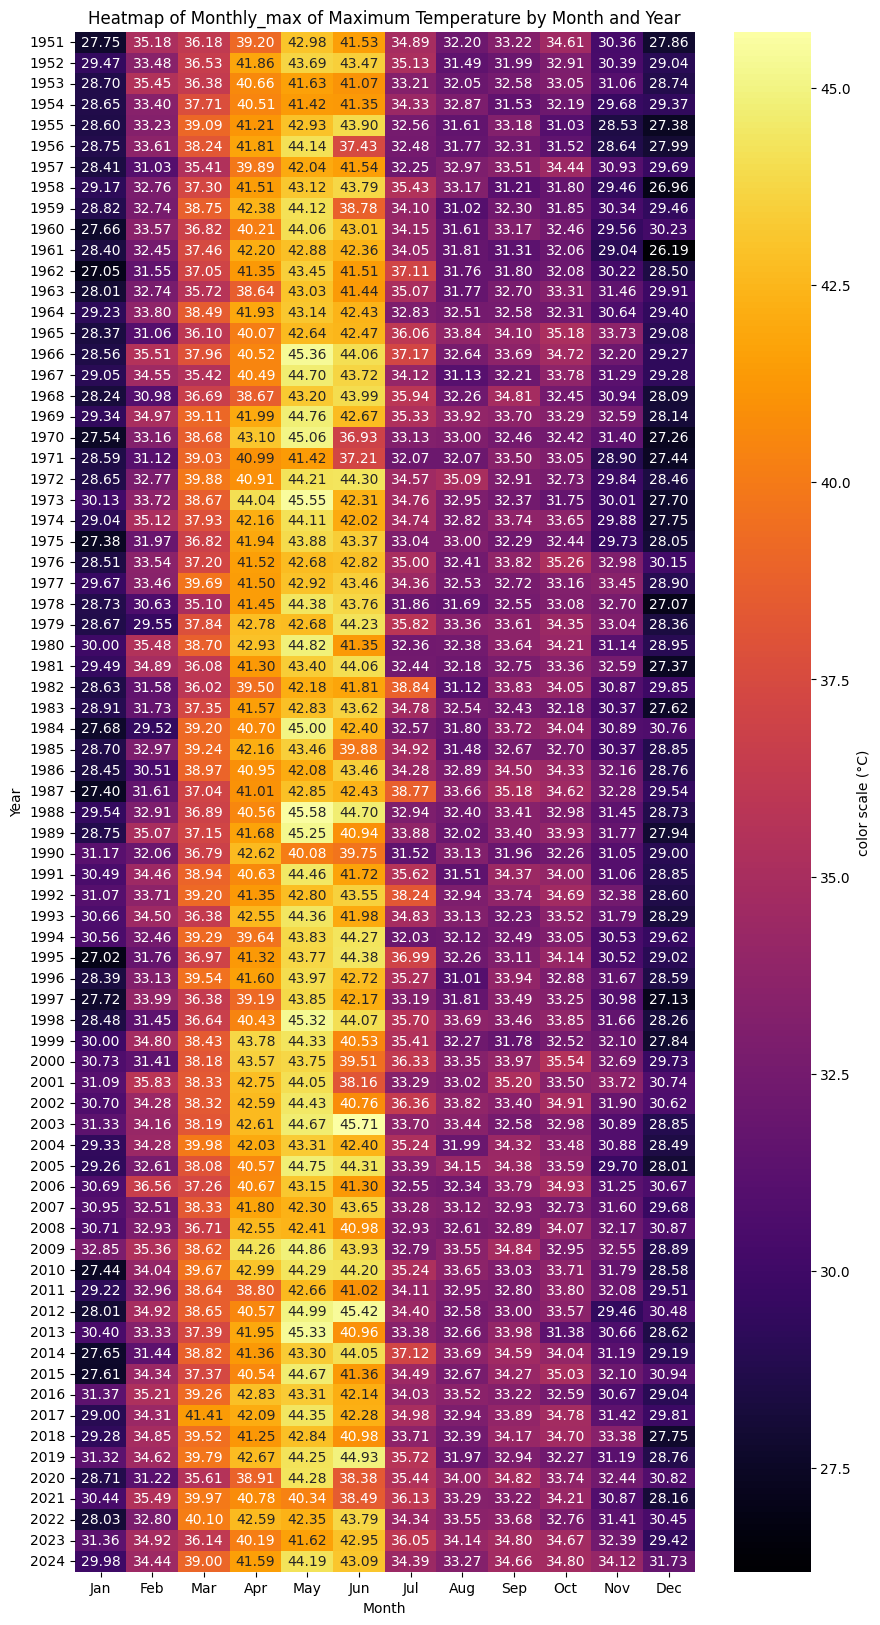

In [3]:
# Ensure DateTime column is datetime and create series with DateTime index for resampling
df['DateTime'] = pd.to_datetime(df['DateTime'])
tmax = df.set_index('DateTime')['tmax']
tmin = df.set_index('DateTime')['tmin']

monthly_tmax = tmax.resample('ME').max()
monthly_tmax = monthly_tmax.reset_index(name='tmax')
monthly_tmax['Year'] = monthly_tmax['DateTime'].dt.year
monthly_tmax['Month'] = monthly_tmax['DateTime'].dt.month

# Pivot the data to create a matrix for the heatmap
heatmap_data = monthly_tmax.pivot(index="Year", columns="Month", values="tmax")

# Plot the heatmap
plt.figure(figsize=(10, 20))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="inferno", cbar_kws={'label': 'color scale (°C)'})
plt.title('Heatmap of Monthly_max of Maximum Temperature by Month and Year')

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names)

plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.show()

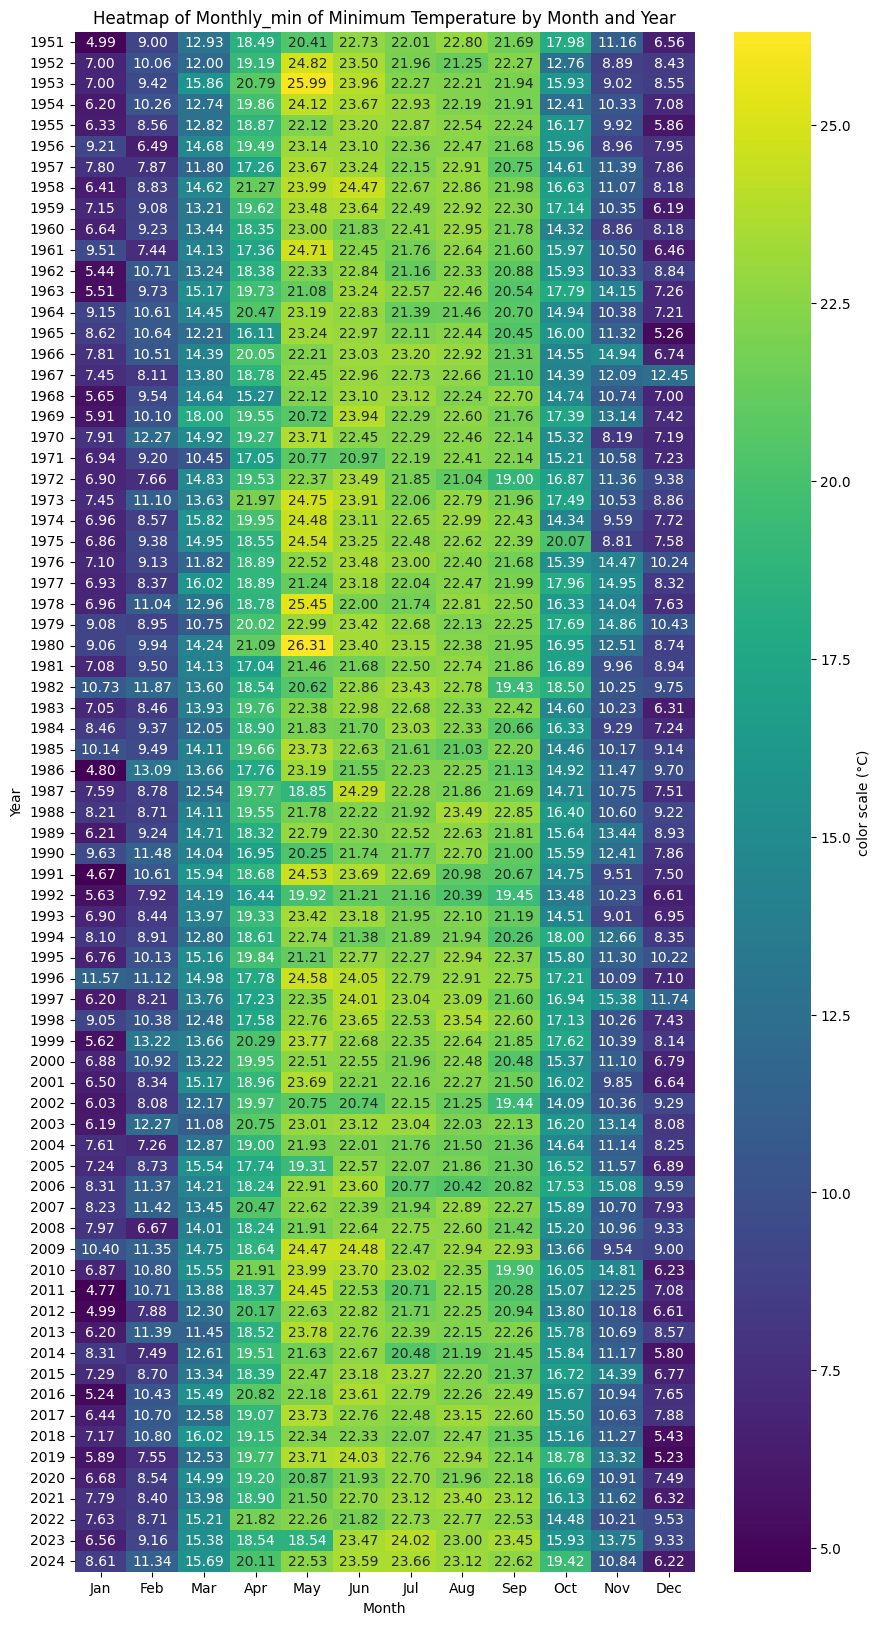

In [4]:
# Compute monthly minima as a Series, then convert to a DataFrame so we can add Year/Month columns safely
monthly_tmin = tmin.resample('ME').min()
monthly_tmin = monthly_tmin.reset_index(name='tmin')  # DataFrame with 'DateTime' and 'tmin'

# Extract year and month from the DateTime column (use .dt to ensure datetime accessor is available)
monthly_tmin['Year'] = monthly_tmin['DateTime'].dt.year
monthly_tmin['Month'] = monthly_tmin['DateTime'].dt.month

# Pivot the data to create a matrix for the heatmap
heatmap_data = monthly_tmin.pivot(index="Year", columns="Month", values="tmin")

# Plot the heatmap
plt.figure(figsize=(10, 20))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'color scale (°C)'})
plt.title('Heatmap of Monthly_min of Minimum Temperature by Month and Year')

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticklabels(month_names)

plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.show()

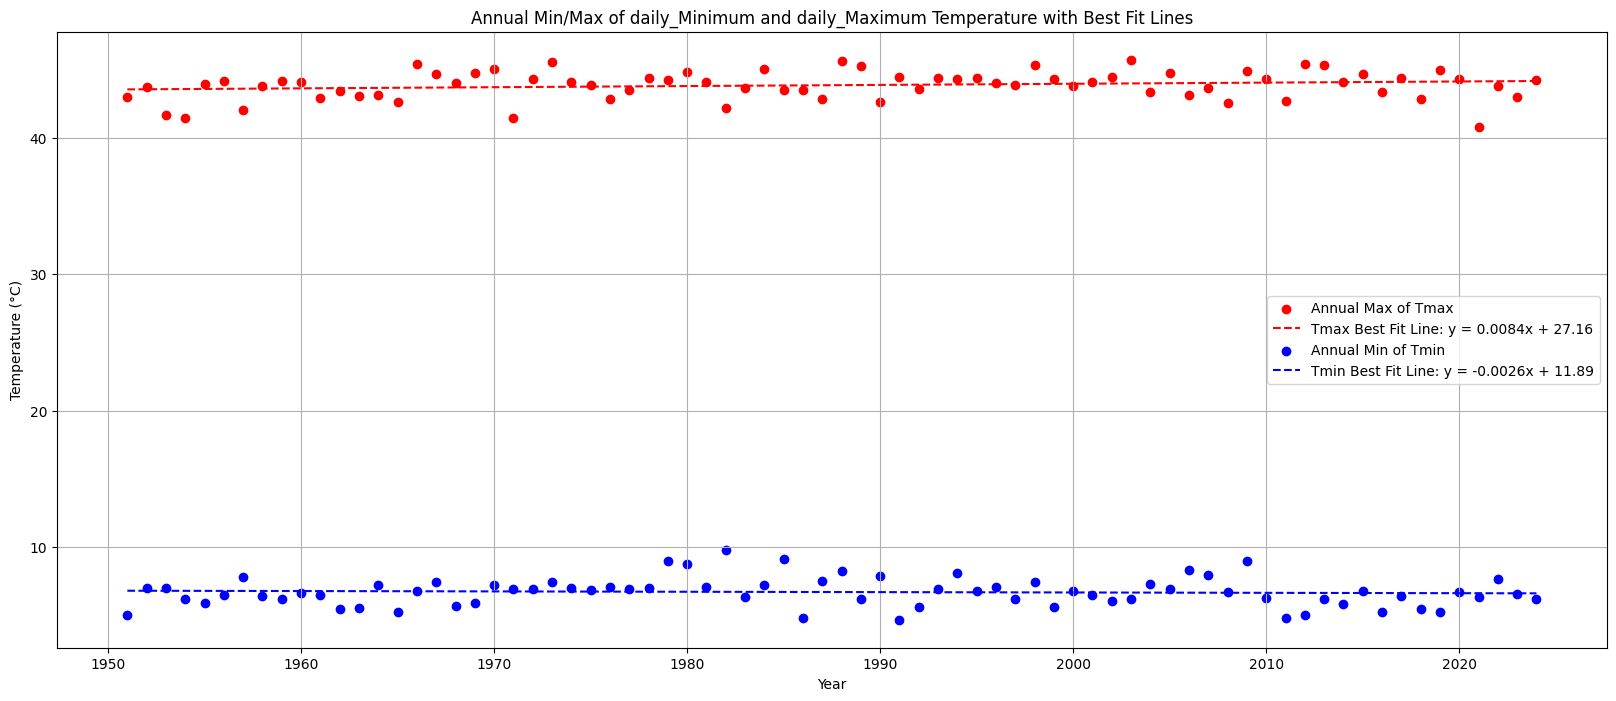

Equation of the best fit line for Tmax: y = 0.0084x + 27.16
Equation of the best fit line for Tmin: y = -0.0026x + 11.89


In [5]:
annual_mean_tmax = tmax.resample('YE').max()
annual_mean_tmin = tmin.resample('YE').min()

# Extract the years and tmin/tmax values
years = annual_mean_tmin.index.year
tmin_values = annual_mean_tmin.values
tmax_values = annual_mean_tmax.values

# Perform linear regression to find the best fit line for tmin
coefficients_tmin = np.polyfit(years, tmin_values, 1)
slope_tmin, intercept_tmin = coefficients_tmin
best_fit_line_tmin = slope_tmin * years + intercept_tmin

# Perform linear regression to find the best fit line for tmax
coefficients_tmax = np.polyfit(years, tmax_values, 1)
slope_tmax, intercept_tmax = coefficients_tmax
best_fit_line_tmax = slope_tmax * years + intercept_tmax

# Plot the data and the best fit lines
plt.figure(figsize=(20, 8))
plt.scatter(years, tmax_values, color='red', label='Annual Max of Tmax')
plt.plot(years, best_fit_line_tmax, color='red', linestyle='--', label=f'Tmax Best Fit Line: y = {slope_tmax:.4f}x + {intercept_tmax:.2f}')
plt.scatter(years, tmin_values, color='blue', label='Annual Min of Tmin')
plt.plot(years, best_fit_line_tmin, color='blue', linestyle='--', label=f'Tmin Best Fit Line: y = {slope_tmin:.4f}x + {intercept_tmin:.2f}')
plt.title('Annual Min/Max of daily_Minimum and daily_Maximum Temperature with Best Fit Lines')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Print the equations of the best fit lines
print(f"Equation of the best fit line for Tmax: y = {slope_tmax:.4f}x + {intercept_tmax:.2f}")
print(f"Equation of the best fit line for Tmin: y = {slope_tmin:.4f}x + {intercept_tmin:.2f}")

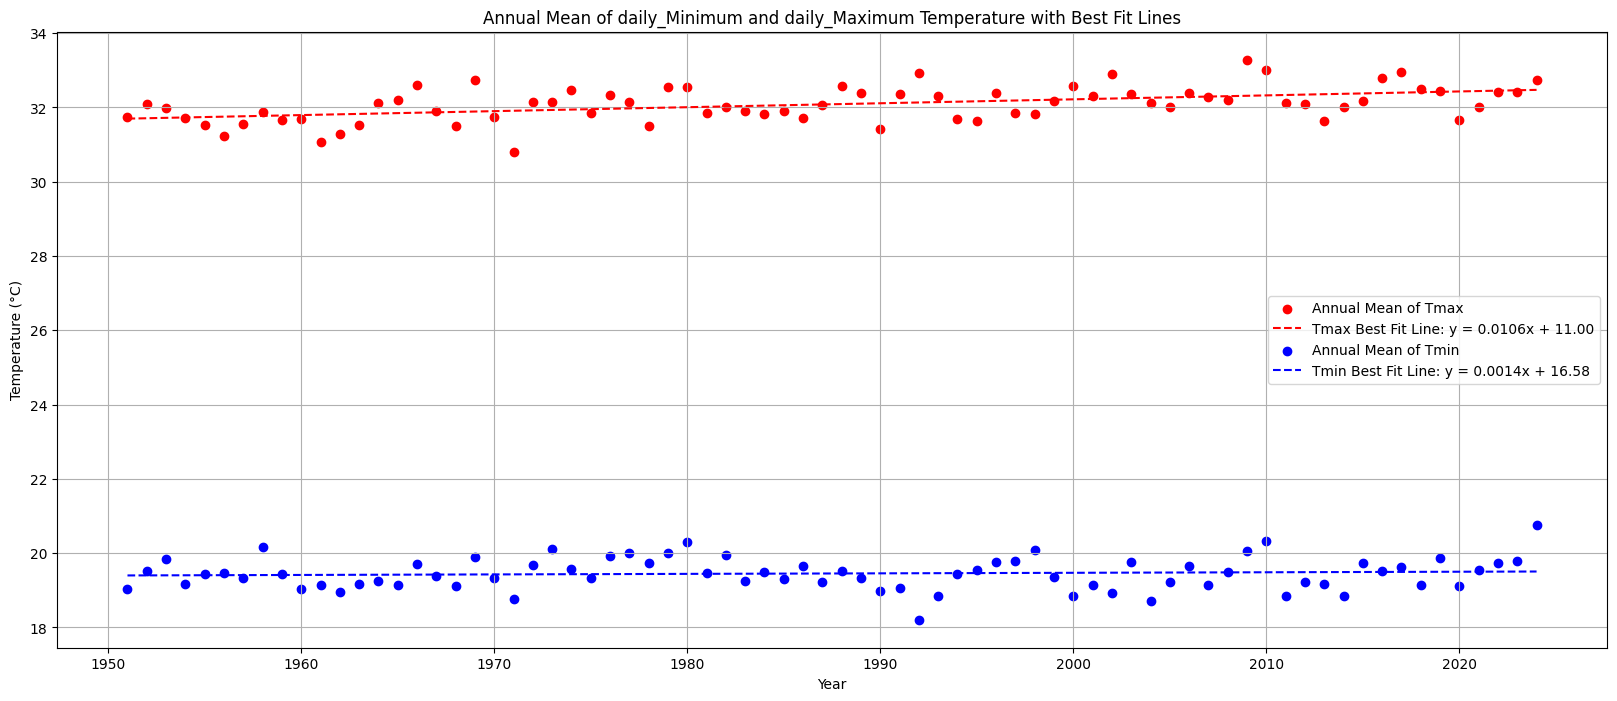

Equation of the best fit line for Tmax: y = 0.0106x + 11.00
Equation of the best fit line for Tmin: y = 0.0014x + 16.58


In [6]:
annual_mean_tmax = tmax.resample('YE').mean()
annual_mean_tmin = tmin.resample('YE').mean()

# Extract the years and tmin/tmax values
years = annual_mean_tmin.index.year
tmin_values = annual_mean_tmin.values
tmax_values = annual_mean_tmax.values

# Perform linear regression to find the best fit line for tmin
coefficients_tmin = np.polyfit(years, tmin_values, 1)
slope_tmin, intercept_tmin = coefficients_tmin
best_fit_line_tmin = slope_tmin * years + intercept_tmin

# Perform linear regression to find the best fit line for tmax
coefficients_tmax = np.polyfit(years, tmax_values, 1)
slope_tmax, intercept_tmax = coefficients_tmax
best_fit_line_tmax = slope_tmax * years + intercept_tmax

# Plot the data and the best fit lines
plt.figure(figsize=(20, 8))
plt.scatter(years, tmax_values, color='red', label='Annual Mean of Tmax')
plt.plot(years, best_fit_line_tmax, color='red', linestyle='--', label=f'Tmax Best Fit Line: y = {slope_tmax:.4f}x + {intercept_tmax:.2f}')
plt.scatter(years, tmin_values, color='blue', label='Annual Mean of Tmin')
plt.plot(years, best_fit_line_tmin, color='blue', linestyle='--', label=f'Tmin Best Fit Line: y = {slope_tmin:.4f}x + {intercept_tmin:.2f}')
plt.title('Annual Mean of daily_Minimum and daily_Maximum Temperature with Best Fit Lines')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Print the equations of the best fit lines
print(f"Equation of the best fit line for Tmax: y = {slope_tmax:.4f}x + {intercept_tmax:.2f}")
print(f"Equation of the best fit line for Tmin: y = {slope_tmin:.4f}x + {intercept_tmin:.2f}")

### tmax

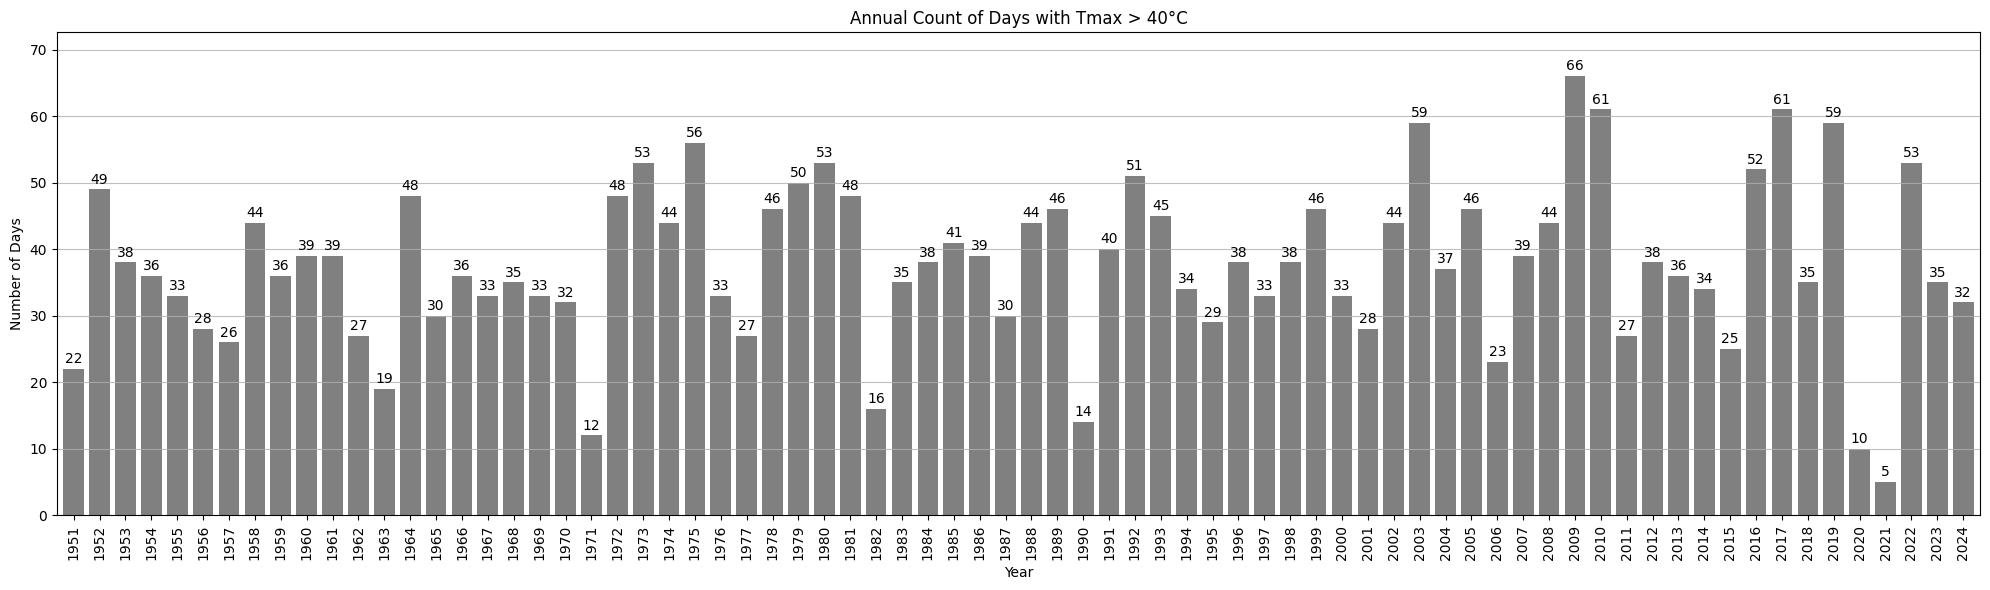

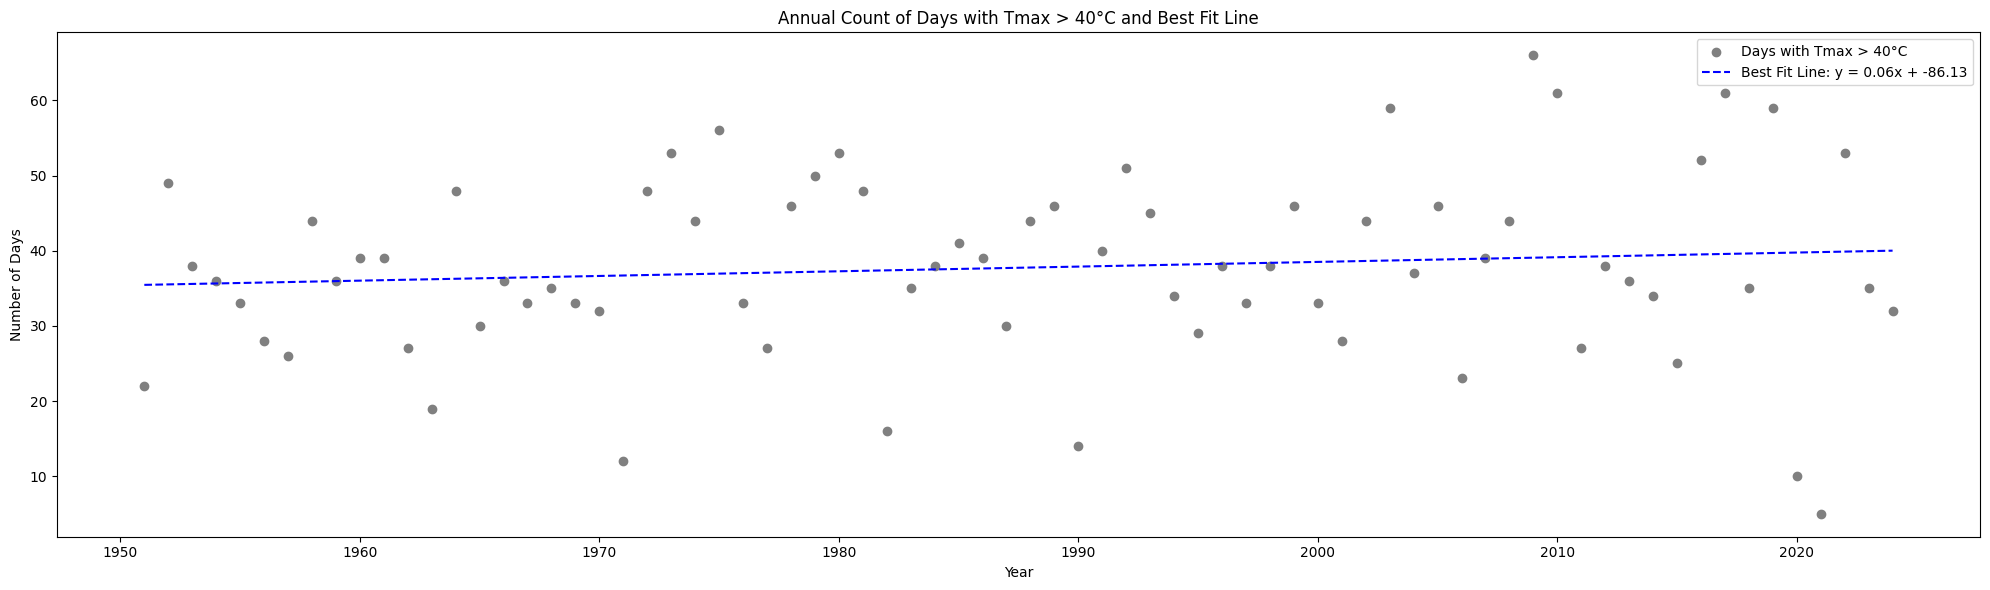

Equation of the best fit line: y = 0.06x + -86.13


In [7]:
x = 40
tmax = df['tmax']
df['DateTime'] = pd.to_datetime(df['DateTime'])

tmax_above_x = tmax > x
annual_count_above_x = tmax_above_x.groupby(df['DateTime'].dt.year).sum()

# --- PLOTTING SECTION ---

plt.figure(figsize=(20, 6))

# 1. Assign the plot to a variable 'ax' so we can manipulate it
ax = annual_count_above_x.plot(kind='bar', color='grey', width=0.8)

# 2. Use bar_label to automatically add values
# 'padding=2' moves the text slightly up so it doesn't touch the bar
ax.bar_label(ax.containers[0], padding=2)

# Standard formatting
plt.title(f'Annual Count of Days with Tmax > {x}°C')
plt.xlabel('Year')
plt.ylabel('Number of Days')

# Adjust y-limit to make room for labels at the very top
plt.ylim(0, annual_count_above_x.max() * 1.1) 

plt.tight_layout()
plt.grid(axis='y', alpha=0.8) # Grid looks cleaner if only on Y-axis
plt.show()



# Scatter plot and best fit line for annual_count_above_x
years = annual_count_above_x.index.values
counts = annual_count_above_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}°C')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with Tmax > {x}°C and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

Series: 'annual_count_above_x' counts days per year with Tmax > 40°C for 1951–2024 (74 years).
- Time span: years array covers 1951 through 2024 inclusive; df contains 27,029 daily records.
- Values vary widely year-to-year; observed counts range from a minimum of 5 (2021) to a maximum of 66.
- Recent-year examples: 2020=10, 2021=5 (notable low), 2022=53 (sharp spike), 2023=35, 2024=32.
- Linear trend: slope ≈ 0.0623 days/year (small positive increase in annual count of hot days).
- Best-fit line is smooth relative to raw counts, indicating persistent but weak upward drift amid strong interannual variability.
- Raw counts show episodic extremes (multiple high-spike years such as 59, 61, 66), so variability dominates the small trend.
- Implication: more hot days are marginally more likely over decades, but high year-to-year volatility calls for significance testing, smoothing, and investigation of drivers (e.g., ENSO, heatwaves, data coverage) before strong conclusions.

### tmin

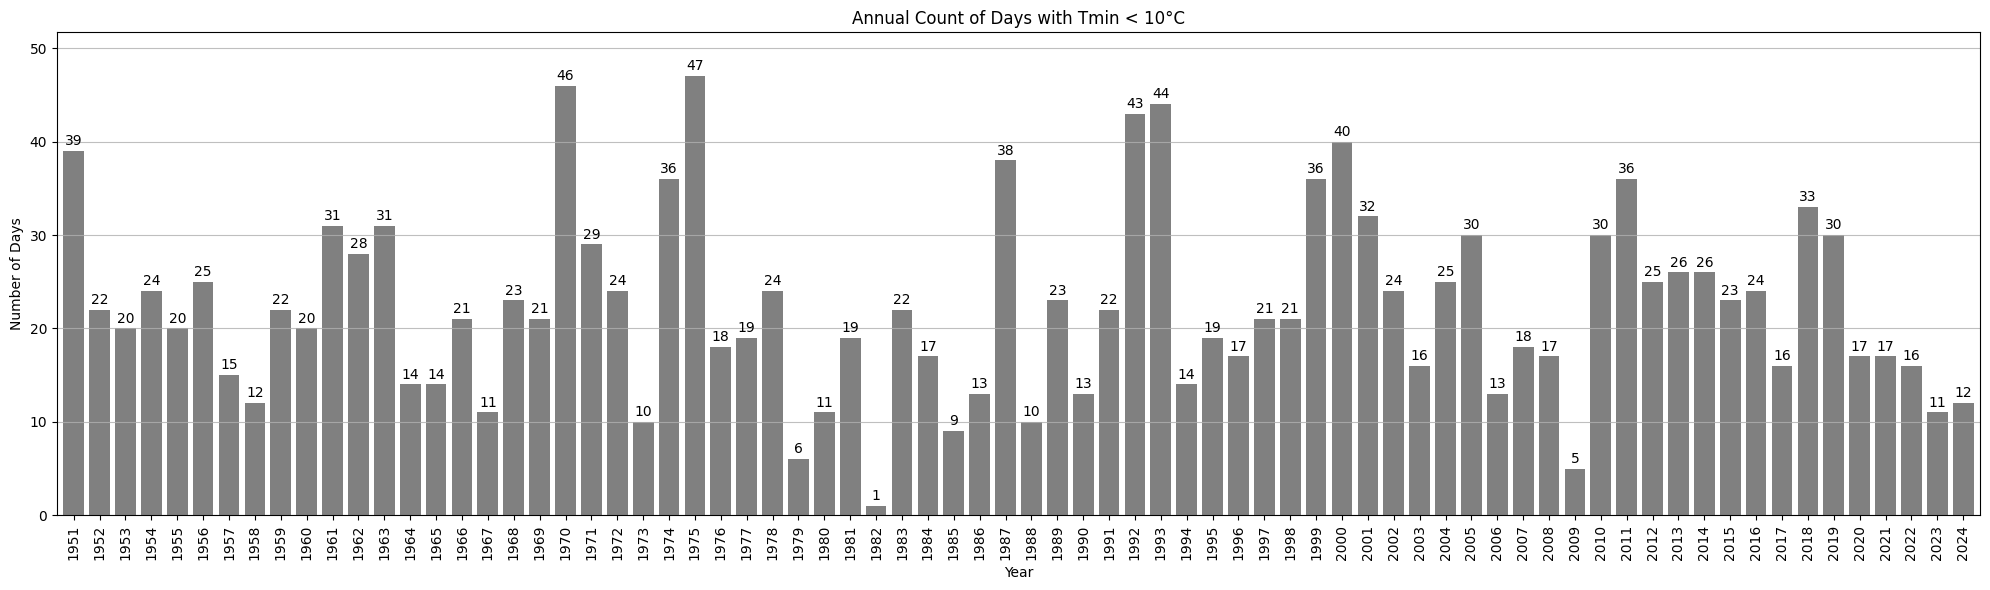

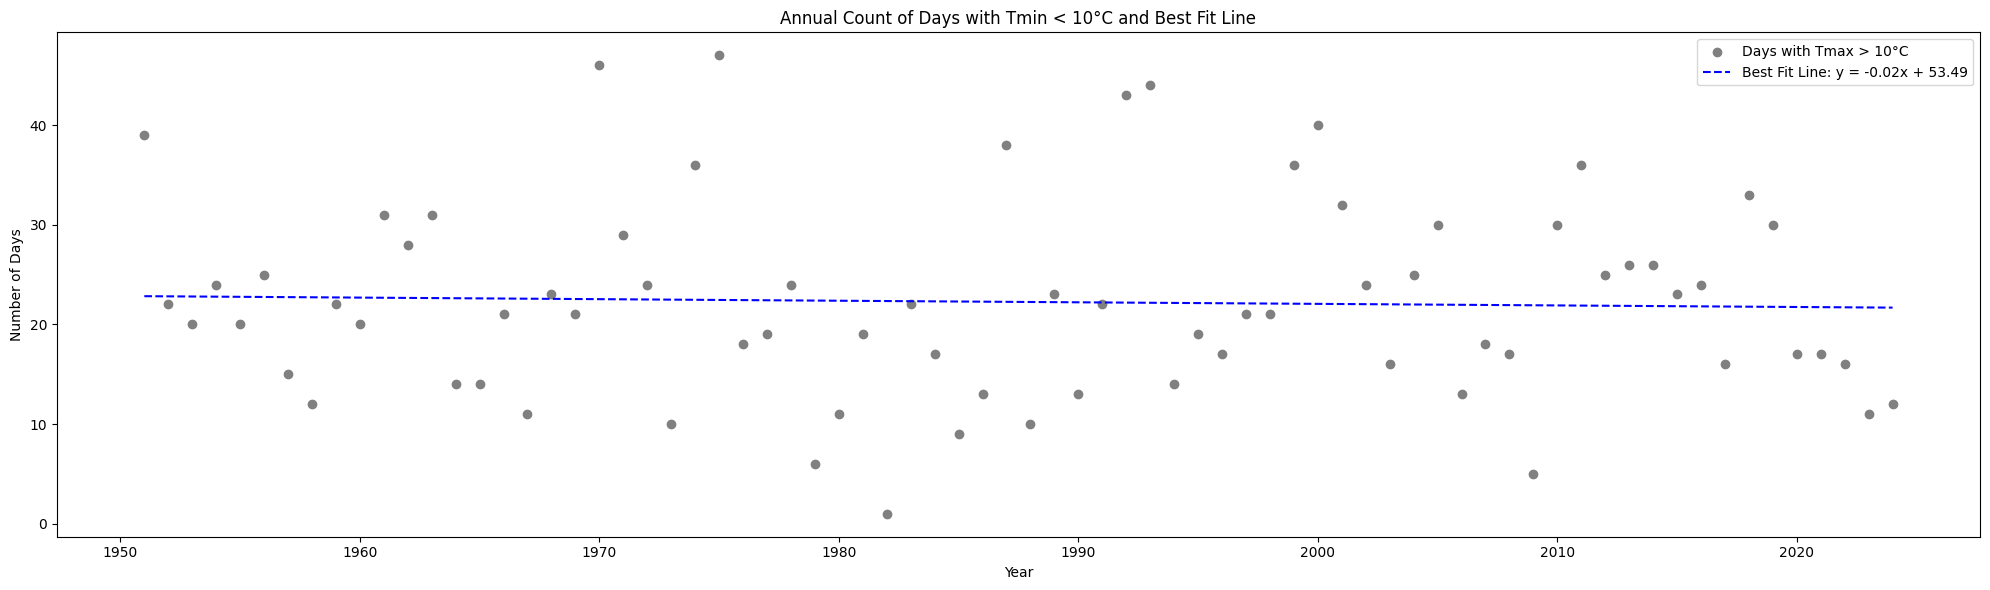

Equation of the best fit line: y = -0.02x + 53.49


In [8]:
x = 10
tmin = df['tmin']
df['DateTime'] = pd.to_datetime(df['DateTime'])

tmin_below_x = tmin < x
annual_count_below_x = tmin_below_x.groupby(df['DateTime'].dt.year).sum()
# --- PLOTTING SECTION ---
plt.figure(figsize=(20, 6))

# 1. Assign the plot to a variable 'ax' so we can manipulate it
ax = annual_count_below_x.plot(kind='bar', color='grey', width=0.8)

# 2. Use bar_label to automatically add values
# 'padding=3' moves the text slightly up so it doesn't touch the bar
ax.bar_label(ax.containers[0], padding=2)

# Standard formatting
plt.title(f'Annual Count of Days with Tmin < {x}°C')
plt.xlabel('Year')
plt.ylabel('Number of Days')

# Adjust y-limit to make room for labels at the very top
plt.ylim(0, annual_count_below_x.max() * 1.1) 

plt.tight_layout()
plt.grid(axis='y', alpha=0.8) # Grid looks cleaner if only on Y-axis
plt.show()

# Scatter plot and best fit line for annual_count_below_x
years = annual_count_below_x.index.values
counts = annual_count_below_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}°C')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with Tmin < {x}°C and Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.2f}x + {intercept:.2f}")

- Data span: 1951–2024 daily observations; annual_count_below_x is the yearly count of days with tmin < 10°C (74 years).
- Observed annual counts range from 1 (minimum) to 47 (maximum), showing large interannual variability.
- Early example: 1951 recorded 39 such days; recent example: 2024 recorded 12 such days — a reduction in cold-day counts at the endpoints.
- Linear regression equation (fitted): y = -0.015712699 * year + 53.48574601999044.
- Slope interpretation: -0.0157 days/year (≈ -1.57 days per century) — a small long-term decrease in cold-day frequency.
- Best-fit line values decline slowly (≈ 22.83 → 21.68 across the fitted series), consistent with the weak negative trend.
- Year-to-year variability dominates the signal: many years deviate substantially above/below the trend (several spikes and deep dips).
- Recent years (2020–2024) show lower counts: 2020=17, 2021=17, 2022=16, 2023=11, 2024=12 — consistent with a downward tendency.
- Dataset completeness: 27,029 daily rows (1951–2024) with non-null DateTime, tmin, tmax, and rain columns.
- Practical implication: there is a modest decline in the number of very cold days over time, but high interannual variability means adaptation planning should rely on multi-year averages and consider extreme years.

### rain

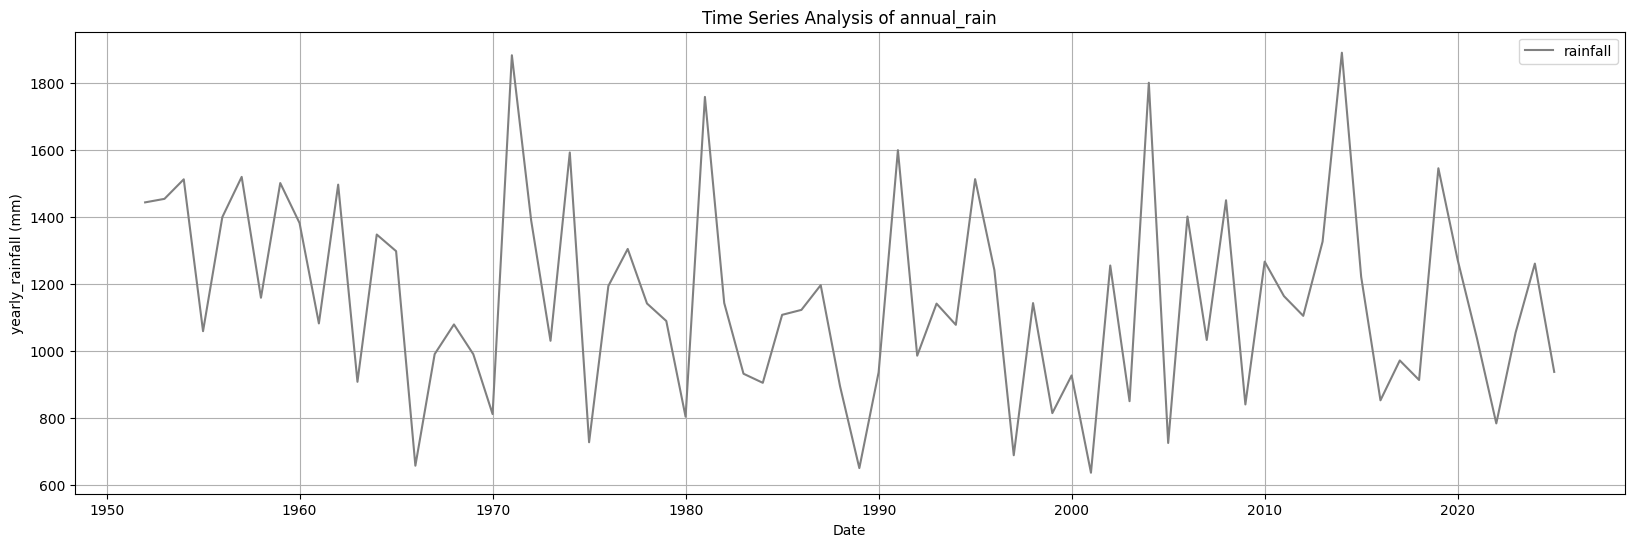

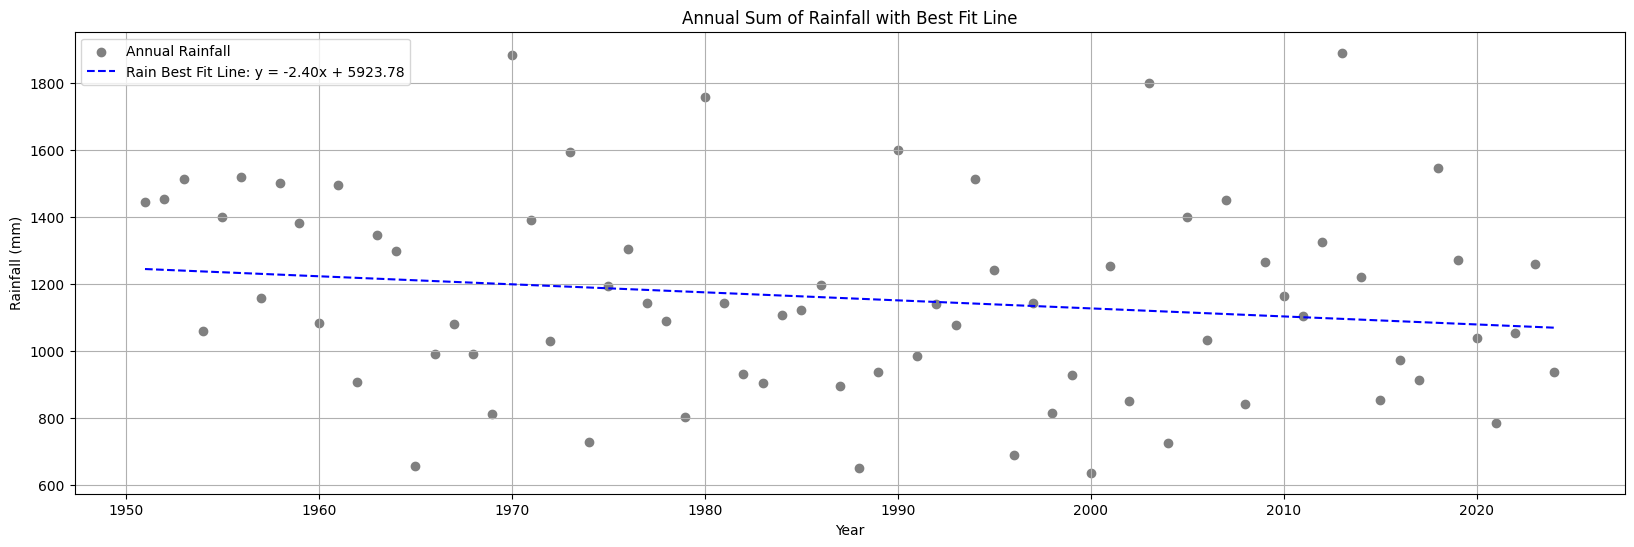

Equation of the best fit line for Rain: y = -2.40x + 5923.78


In [9]:
# Set DateTime as index for resampling
df_index = df.set_index('DateTime')

plt.figure(figsize=(20, 6))
# use df_tmin which already has DateTime as the index
annual_rain = df_index.resample('YE').sum()  # resample the DataFrame so 'rain' column is available
plt.plot(annual_rain.index, annual_rain['rain'], label='rainfall', color='grey')
plt.title('Time Series Analysis of annual_rain')
plt.xlabel('Date')
plt.ylabel('yearly_rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


annual_sum = df_index.resample('YE').sum()
# Extract the years and rainfall values
years = annual_sum.index.year
annual_rain = annual_sum['rain'].values

# Perform linear regression to find the best fit line for rainfall
coefficients_rain = np.polyfit(years, annual_rain, 1)
slope_rain, intercept_rain = coefficients_rain
best_fit_line_rain = slope_rain * years + intercept_rain

# Plot the data and the best fit lines
plt.figure(figsize=(20, 6))
plt.scatter(years, annual_rain, color='grey', label='Annual Rainfall')
plt.plot(years, best_fit_line_rain, color='blue', linestyle='--', label=f'Rain Best Fit Line: y = {slope_rain:.2f}x + {intercept_rain:.2f}')
plt.title('Annual Sum of Rainfall with Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the best fit line
print(f"Equation of the best fit line for Rain: y = {slope_rain:.2f}x + {intercept_rain:.2f}")

- Annual totals show large interannual variability (annual_rain spans roughly ~636 mm to ~1890 mm).
- The fitted linear trend for annual rainfall is slightly negative: slope ≈ -2.40 mm/year (coefficients_rain).
- There are clear episodic extremes (several pronounced wet years and several very dry years).
- Annual counts of days exceeding the rain threshold (annual_count_above_x) also vary strongly between years (~46–106 days).
- The trend in the count of threshold-exceeding days is weak (slope ≈ -0.113 days/year for that series), so changes are small per year.
- Scatter + best-fit plots highlight the weak long-term signal versus strong interannual fluctuations.
- Daily/day-of-year comparison plots show clear seasonal structure (monsoon-period concentration) and different seasonal intensity/timing across years.

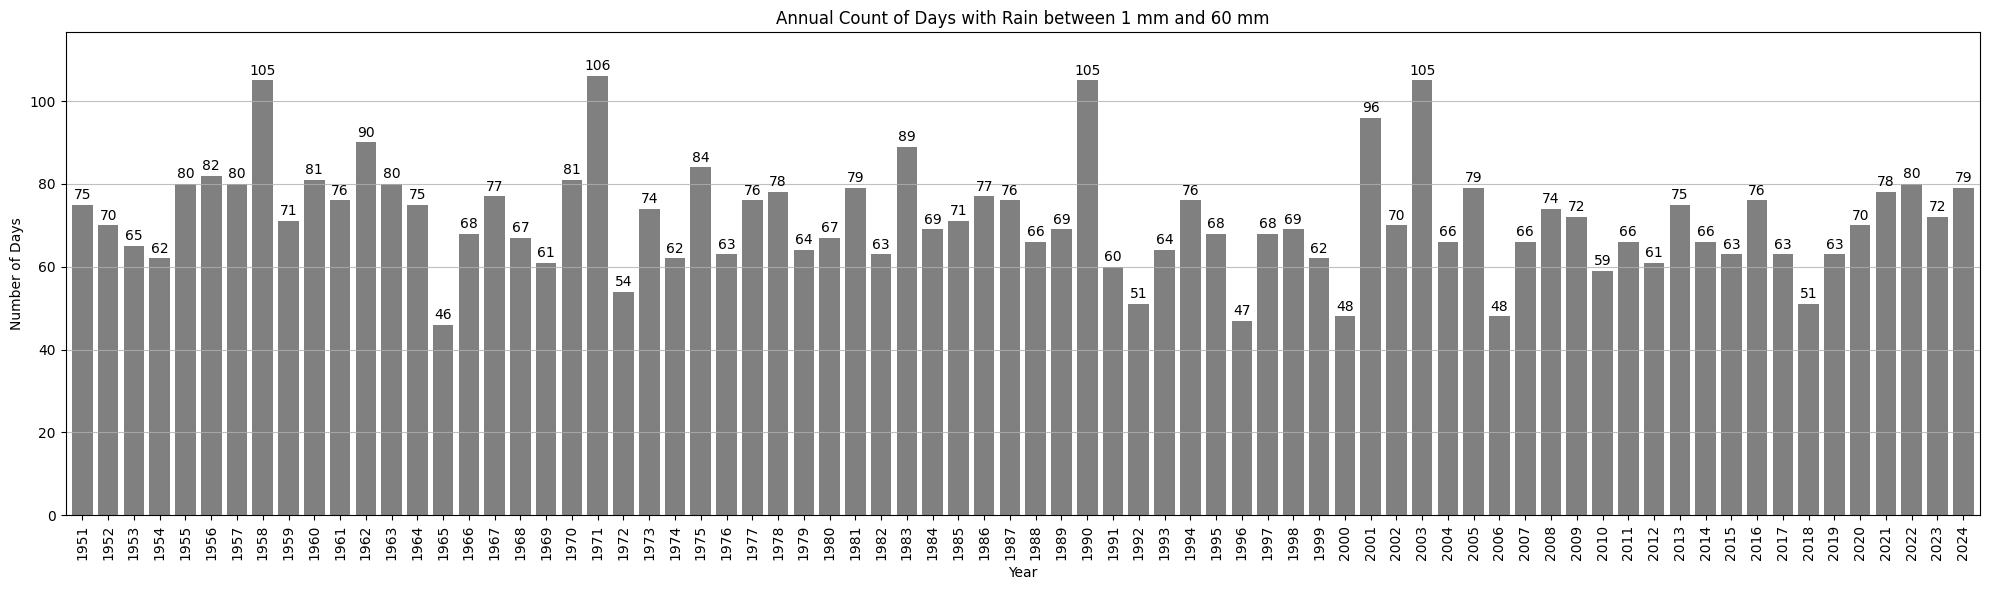

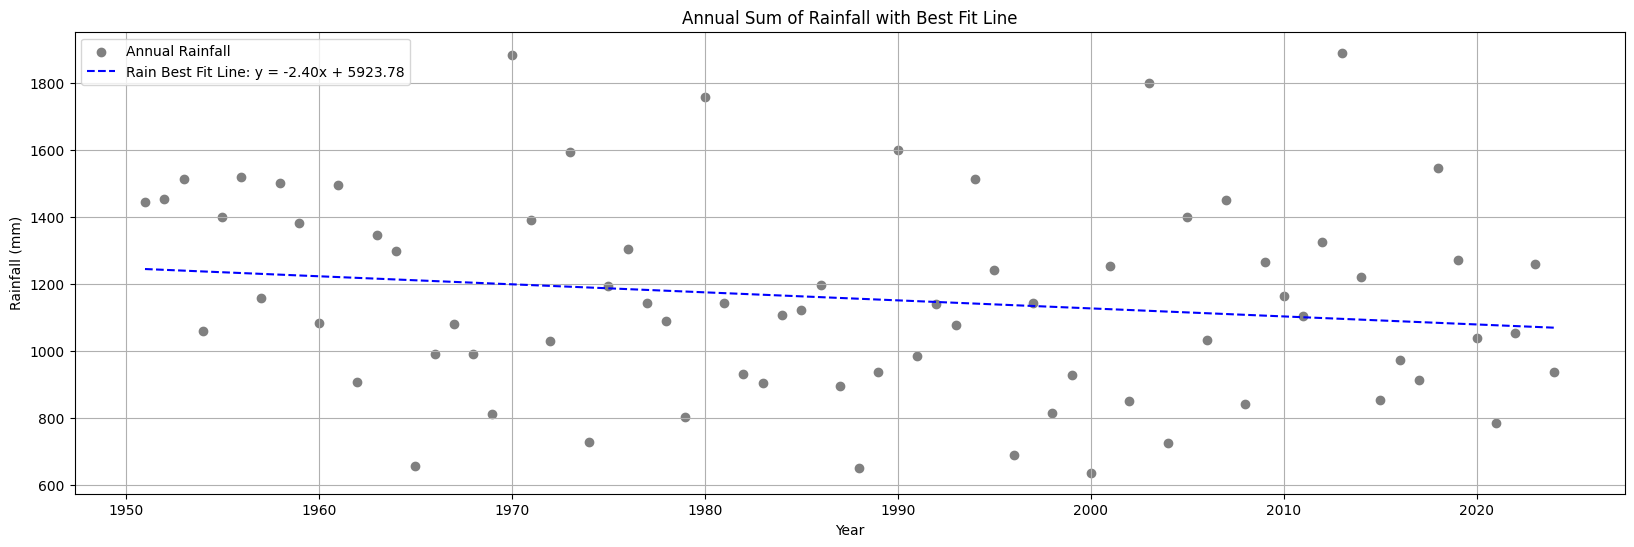

Equation of the best fit line for Rain: y = -2.40x + 5923.78


In [10]:
x = 1  # You can set any rain between x & y here
y = 60
rain = df['rain']
df['DateTime'] = pd.to_datetime(df['DateTime'])

rain_between_x_y = (rain > x) & (rain < y)
annual_count_between_x_y = rain_between_x_y.groupby(df['DateTime'].dt.year).sum()
# --- PLOTTING SECTION ---
plt.figure(figsize=(20, 6))

# 1. Assign the plot to a variable 'ax' so we can manipulate it
ax = annual_count_between_x_y.plot(kind='bar', color='grey', width=0.8)

# 2. Use bar_label to automatically add values
# 'padding=3' moves the text slightly up so it doesn't touch the bar
ax.bar_label(ax.containers[0], padding=2)

# Standard formatting
plt.title(f'Annual Count of Days with Rain between {x} mm and {y} mm')
plt.xlabel('Year')
plt.ylabel('Number of Days')

# Adjust y-limit to make room for labels at the very top
plt.ylim(0, annual_count_between_x_y.max() * 1.1) 

plt.tight_layout()
plt.grid(axis='y', alpha=0.8) # Grid looks cleaner if only on Y-axis
plt.show()



annual_sum = df.resample('YE', on='DateTime').sum()
# Extract the years and rainfall values
years = annual_sum.index.year
annual_rain = annual_sum['rain'].values

# Perform linear regression to find the best fit line for rainfall
coefficients_rain = np.polyfit(years, annual_rain, 1)
slope_rain, intercept_rain = coefficients_rain
best_fit_line_rain = slope_rain * years + intercept_rain

# Plot the data and the best fit lines
plt.figure(figsize=(20, 6))
plt.scatter(years, annual_rain, color='grey', label='Annual Rainfall')
plt.plot(years, best_fit_line_rain, color='blue', linestyle='--', label=f'Rain Best Fit Line: y = {slope_rain:.2f}x + {intercept_rain:.2f}')
plt.title('Annual Sum of Rainfall with Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the equation of the best fit line
print(f"Equation of the best fit line for Rain: y = {slope_rain:.2f}x + {intercept_rain:.2f}")

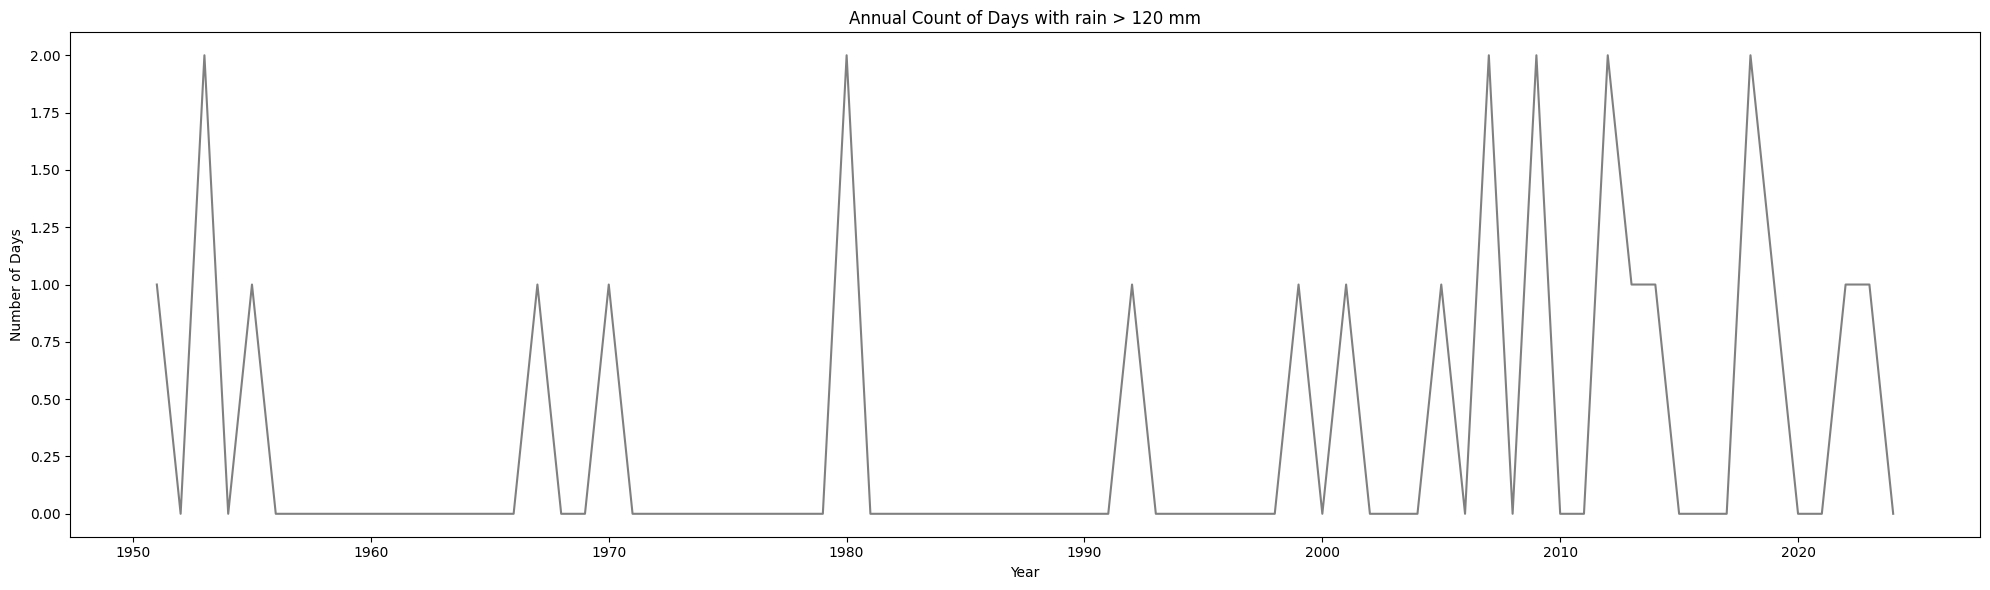

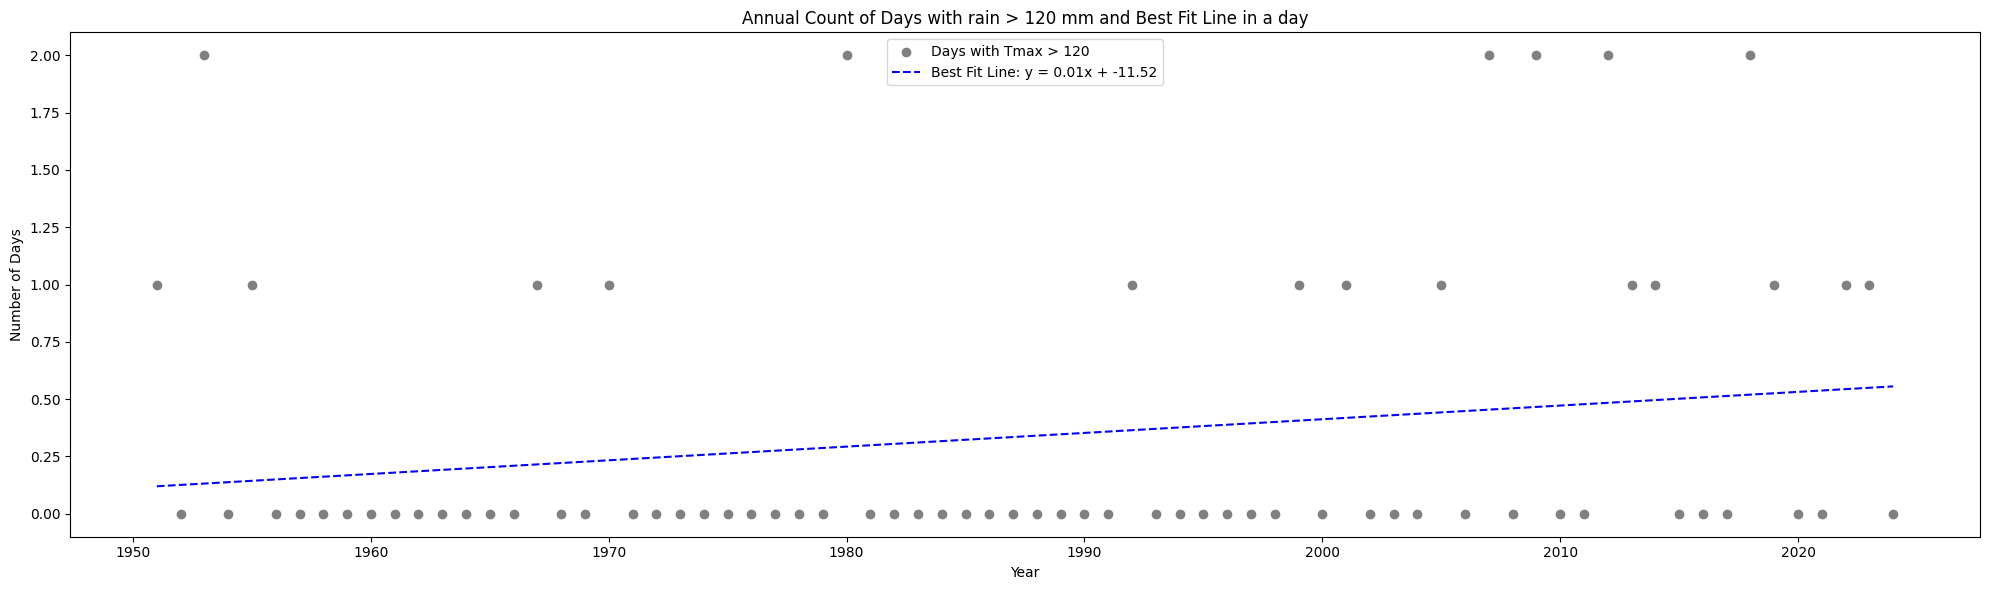

Equation of the best fit line: y = 0.0060x + -11.52


In [11]:
x = 120  # You can set any rain threshold here

rain = df['rain']
# Ensure DateTime column is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Count the number of days each year where rain > x mm
rain_above_x = rain > x
annual_count_above_x = rain_above_x.groupby(df['DateTime'].dt.year).sum()

# Plot the bar graph
plt.figure(figsize=(20, 6))
annual_count_above_x.plot(kind='line', color='grey')
plt.title(f'Annual Count of Days with rain > {x} mm')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()


# Scatter plot and best fit line for annual_count_above_x
years = annual_count_above_x.index.values
counts = annual_count_above_x.values

# Linear regression for best fit line
coefficients = np.polyfit(years, counts, 1)
slope, intercept = coefficients
best_fit_line = slope * years + intercept

plt.figure(figsize=(20, 6))
plt.scatter(years, counts, color='grey', label=f'Days with Tmax > {x}')
plt.plot(years, best_fit_line, color='blue', linestyle='--', label=f'Best Fit Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Annual Count of Days with rain > {x} mm and Best Fit Line in a day')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Equation of the best fit line: y = {slope:.4f}x + {intercept:.2f}")

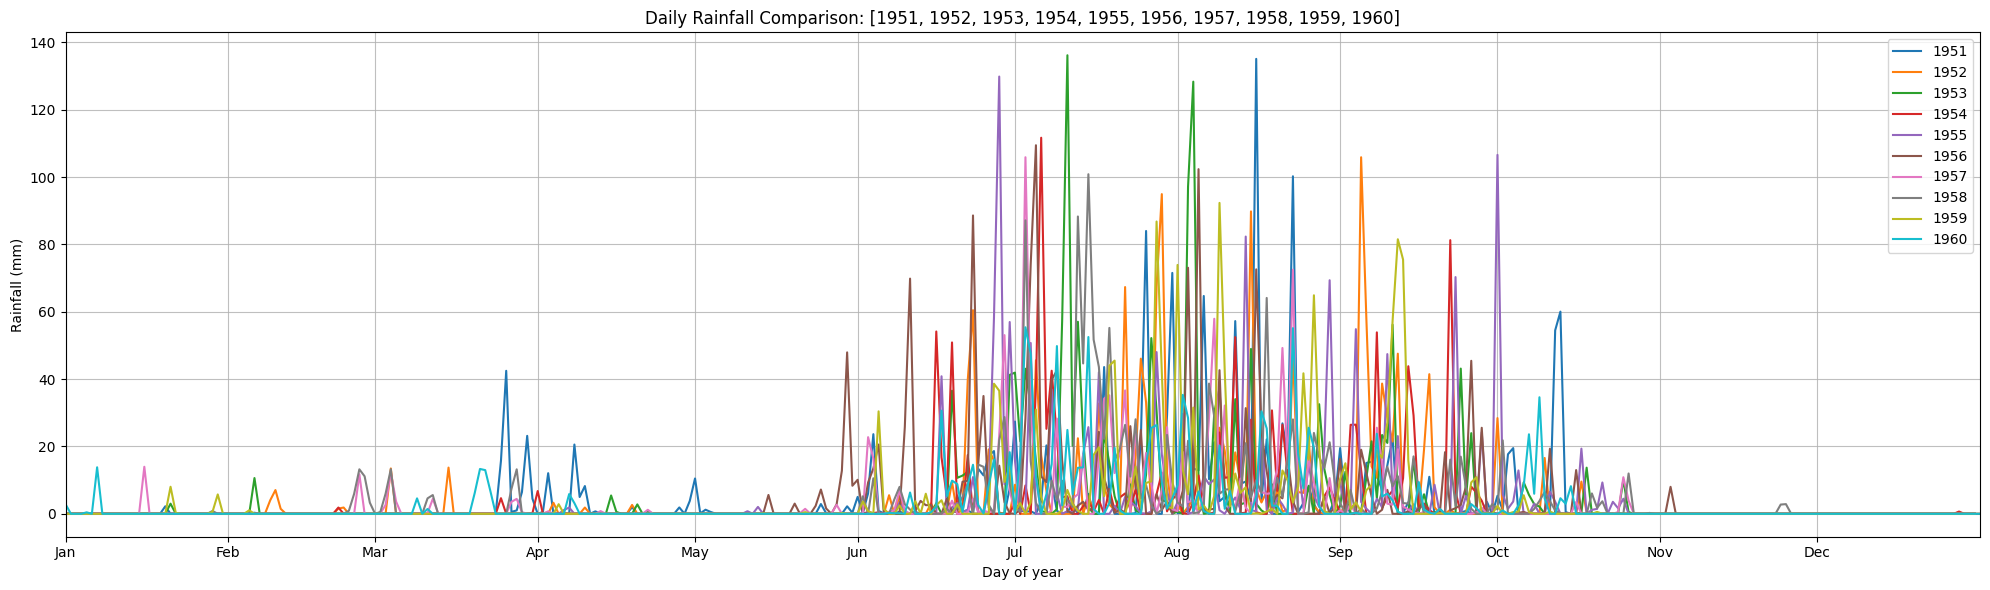

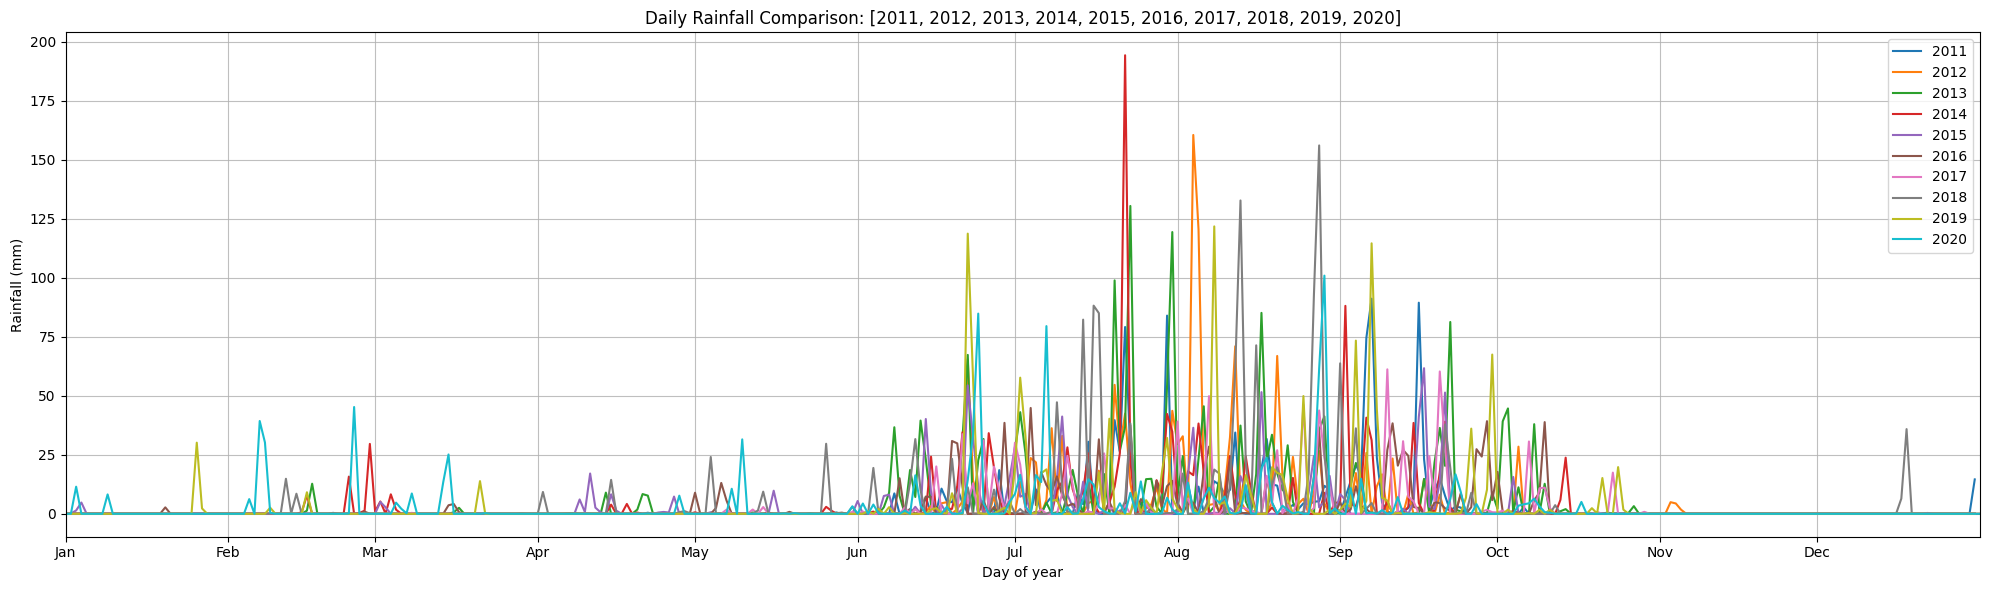

In [12]:
years = [1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]
plt.figure(figsize=(20, 6))

# Use a full 1..366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['rain'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall Comparison: {years}')
plt.legend()
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()



years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
#years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.figure(figsize=(20, 6))

# Use a full 1..366 day-of-year index so leap-year series align on the plot
full_days = np.arange(1, 367)

for y in years:
    yr_df = df[df['DateTime'].dt.year == y]
    if yr_df.empty:
        print(f"No data for year {y}")
        continue
    # Aggregate by day-of-year (sum in case of multiple records per day)
    daily_rain = yr_df.groupby(yr_df['DateTime'].dt.dayofyear)['rain'].sum()
    # Reindex to full range so lines align; missing days become NaN
    daily_rain = daily_rain.reindex(full_days)
    plt.plot(full_days, daily_rain, label=str(y), linewidth=1.5)

# X-axis: month tick positions (use a non-leap reference for consistent month starts)
month_starts = pd.to_datetime([f'2001-{m:02d}-01' for m in range(1, 13)]).dayofyear
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_starts, month_names)

plt.xlim(1, 366)
plt.xlabel('Day of year')
plt.ylabel('Rainfall (mm)')
plt.title(f'Daily Rainfall Comparison: {years}')
plt.legend()
plt.grid(alpha=0.8)
plt.tight_layout()
plt.show()